In [1]:
# IMporting essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading dataset
insurance_fraud = pd.read_csv('Automobile_insurance_fraud.csv')
insurance_fraud.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [3]:
# Reading head
insurance_claims = pd.read_csv('Auto_Insurance_Claims_amount')
insurance_claims.head()

Customer Country State Code     State  Claim Amount Response  Coverage  \
0  BU79786      US         KS    Kansas    276.351928       No     Basic   
1  QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2  AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3  WW63253      US         MO  Missouri    764.586183       No     Basic   
4  HB64268      US         KS    Kansas    281.369258       No     Basic   

  Education Effective To Date EmploymentStatus  ...  \
0  Bachelor           2/24/11         Employed  ...   
1  Bachelor           1/31/11       Unemployed  ...   
2  Bachelor           2/19/11         Employed  ...   
3  Bachelor           1/20/11       Unemployed  ...   
4  Bachelor            2/3/11         Employed  ...   

  Months Since Policy Inception  Number of Open Complaints Number of Policies  \
0                           5.0                        0.0                1.0   
1                          42.0                        0.0                8.0   
2                          38.0                        0.0                2.0   
3                          65.0                        0.0                7.0   
4                          44.0                        0.0                1.0   

      Policy Type        Policy  Claim Reason  Sales Channel  \
0  Corporate Auto  Corporate L3     Collision          Agent   
1   Personal Auto   Personal L3  Scratch/Dent          Agent   
2   Personal Auto   Personal L3     Collision          Agent   
3  Corporate Auto  Corporate L2     Collision    Call Center   
4   Personal Auto   Personal L1     Collision          Agent   

   Total Claim Amount  Vehicle Class Vehicle Size  
0          384.811147   Two-Door Car      Medsize  
1         1131.464935  Four-Door Car      Medsize  
2          566.472247   Two-Door Car      Medsize  
3          529.881344            SUV      Medsize  
4          138.130879  Four-Door Car      Medsize  

[5 rows x 26 columns]

# Lets first predect fraud detection

In [4]:
insurance_fraud

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [5]:
insurance_fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
insurance_fraud['_c39'].unique()

array([nan])

In [7]:
# Dropping the column
insurance_fraud.drop(['_c39'], axis = 1, inplace = True)

In [8]:
insurance_fraud.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

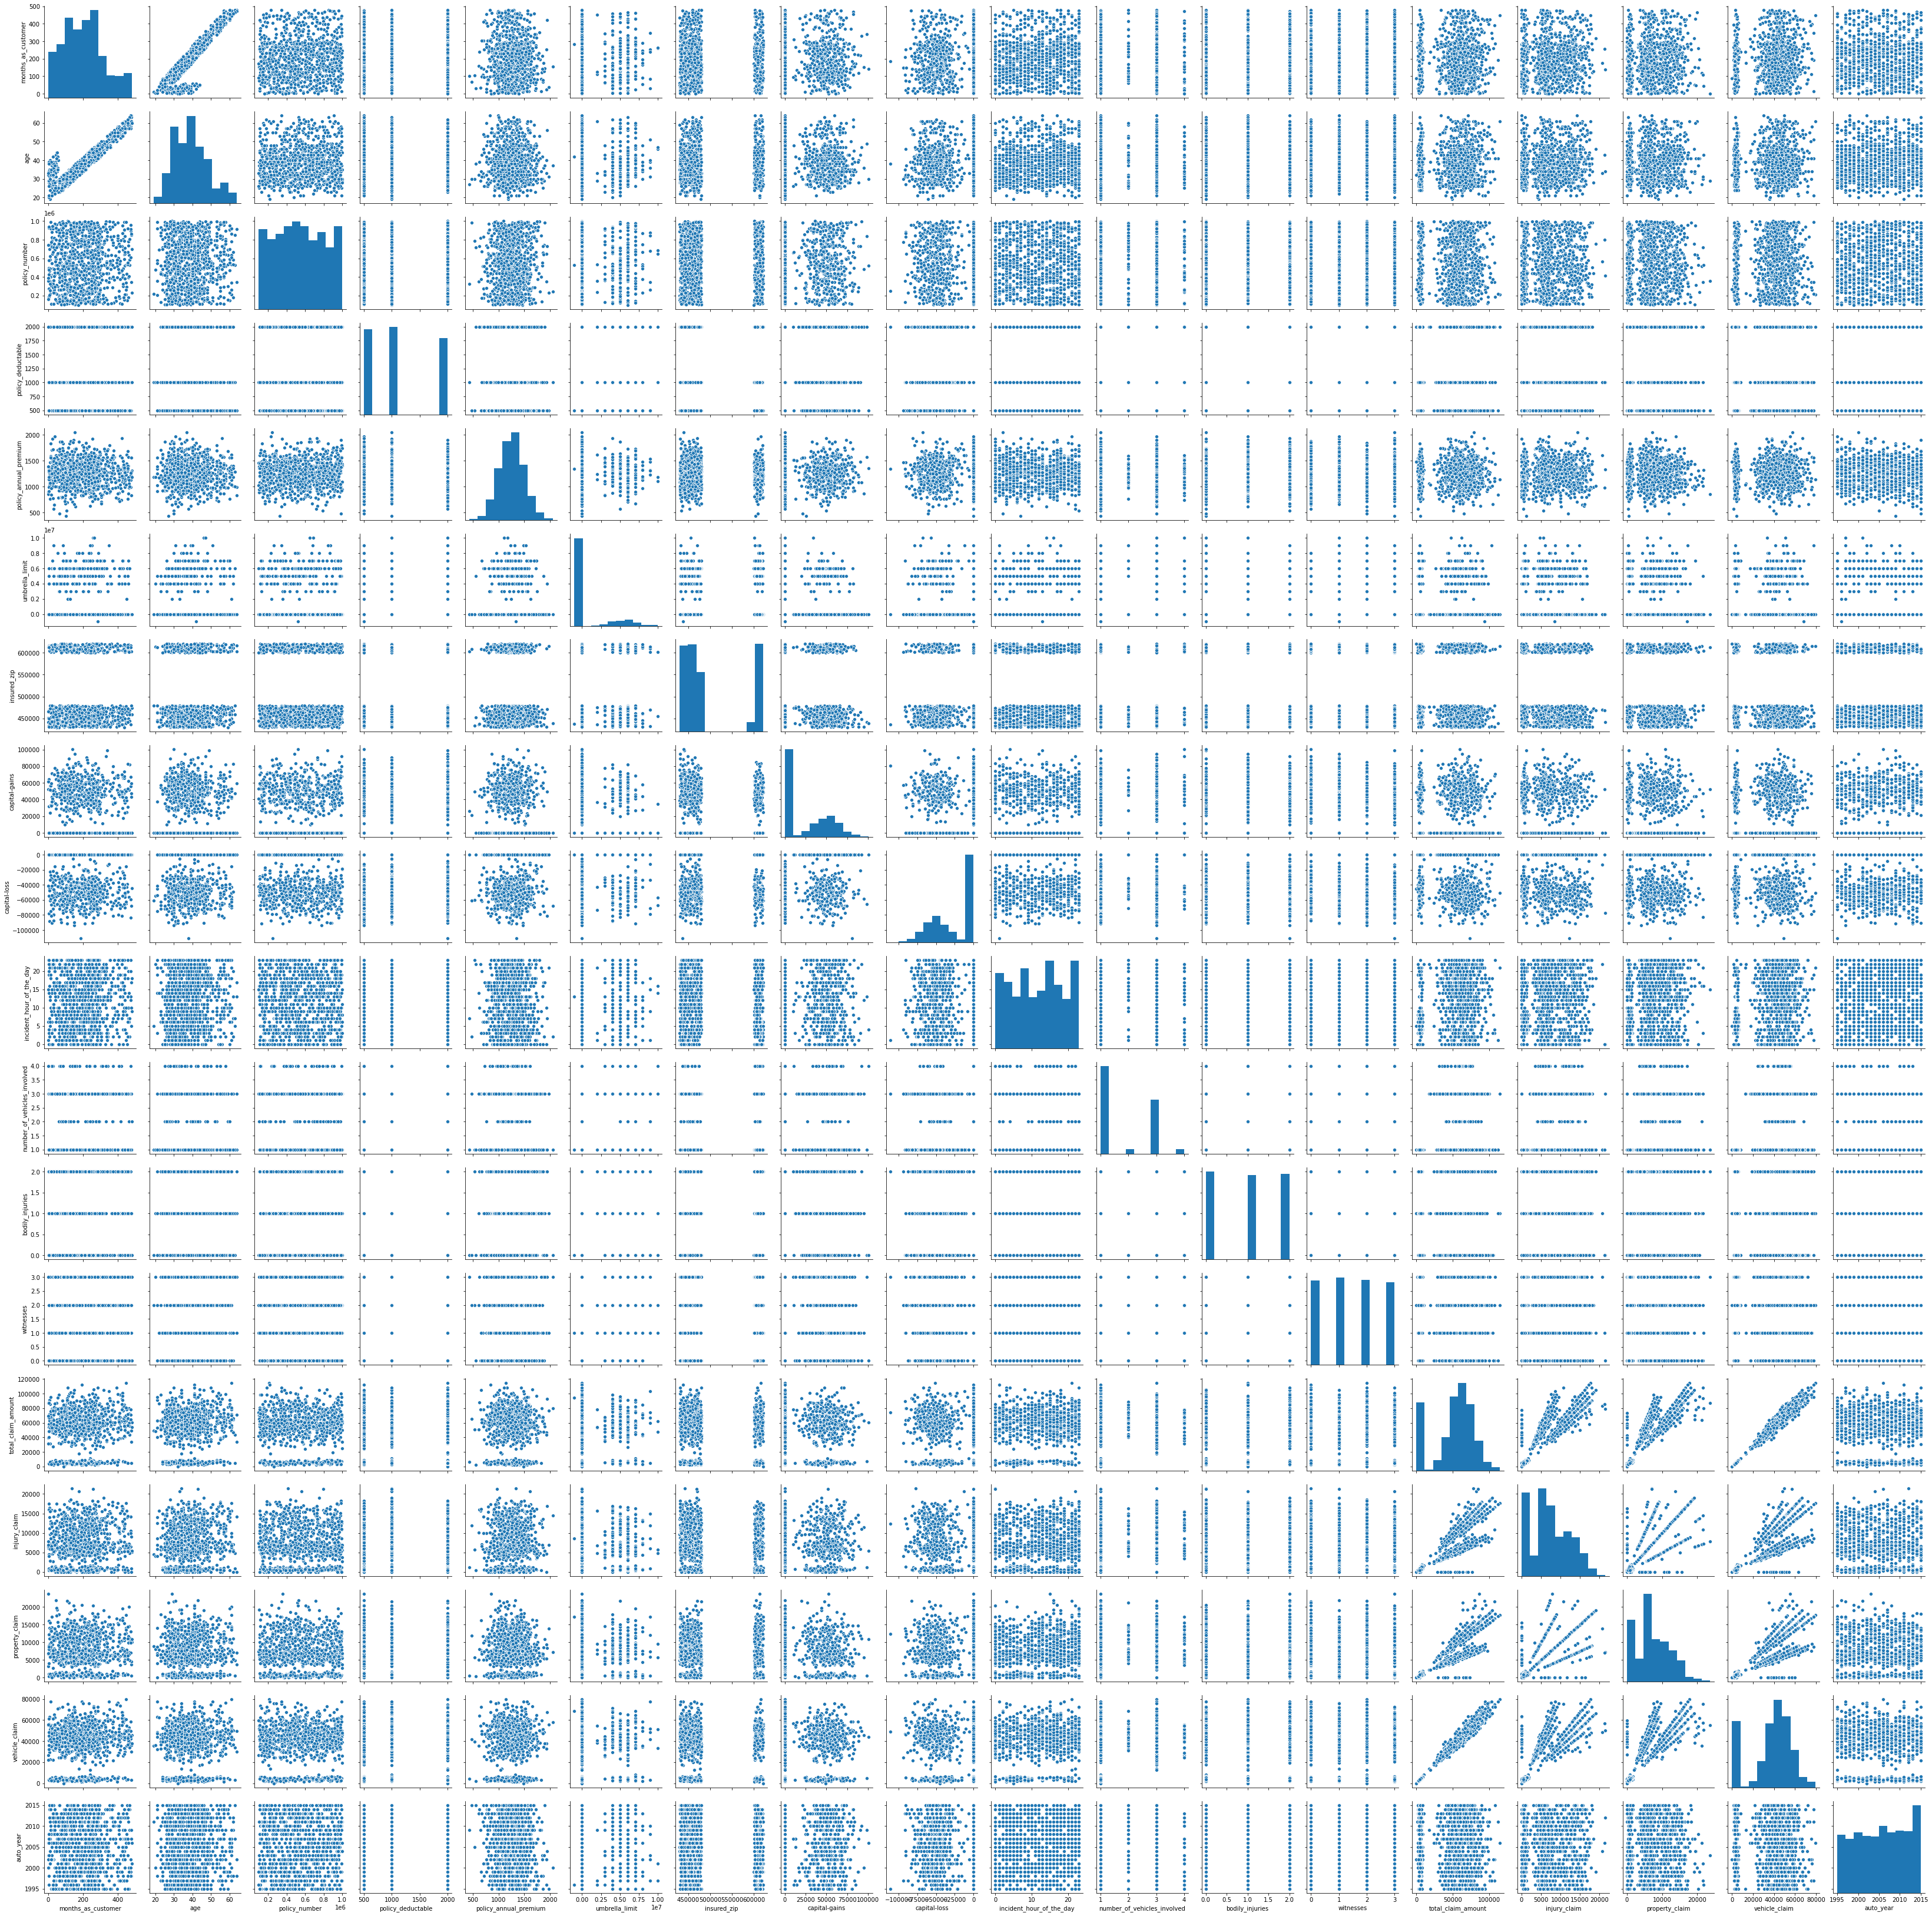

In [9]:
# Visualizing
sns.pairplot(insurance_fraud)

In [10]:
col = insurance_fraud.columns

In [11]:
# Checking unique values in the columns
for i in col:
    print(i, insurance_fraud[i].unique())

months_as_customer [328 228 134 256 137 165  27 212 235 447  60 121 180 473  70 140 160 196
 460 217 370 413 237   8 257 202 224 241  64 166 155 114 149 147  62 289
 431 199  79 116  37 106 269 265 163 355 175 192 430  91 223 195  22 439
  94  11 151 154 245 119 215 295 254 107 478 128 338 271 222 120 270 319
 194 227 244  78 200 284 275 153  31  41 127  61 207 219  80 325  29 239
 279 350 464 118 298  87 261 453 210 168 390 258 225 164 255 206 203 211
 274  81 280 112  24  93 171 124 287 122 398 214 209  82 193 288 104 101
 375 461 428  45 136 216 278 108  14 276  47  73 294 324  53 426 111  86
 296 125 177 238 449 252 359  19 285  30 342 468 343 404  63 335 142 272
  69  38 281 246 330 362 371 377 172  99 249 190 174  95   2 117 242 440
  20 208 156 232  84 394  35 369 332 243 264  32 259 186 201 436 189 105
  88  40  59  39 123 231 247  48 267 286 253  10 158   1  85 233 266  97
 399 305 129 283  96 176 159 290 299  66 334 429  15 230 250  65 475  77
 229 110 292 451 150 291 162 309

In [12]:
print('collision_type : ', insurance_fraud['collision_type'].unique())
print('property_damage : ', insurance_fraud['property_damage'].unique())

collision_type :  ['Side Collision' '?' 'Rear Collision' 'Front Collision']
property_damage :  ['YES' '?' 'NO']


In [13]:
# Replacing the '?' in the dataset
insurance_fraud['collision_type'] = insurance_fraud['collision_type'].replace(['?'], insurance_fraud['collision_type'].mode())

In [14]:
print('collision_type : ', insurance_fraud['collision_type'].unique())

collision_type :  ['Side Collision' 'Rear Collision' 'Front Collision']


In [15]:
# Replacing the '?' in the dataset
insurance_fraud['property_damage'] = insurance_fraud['property_damage'].replace(['?'], 'NO')

In [16]:
print('property_damage : ', insurance_fraud['property_damage'].unique())

property_damage :  ['YES' 'NO']


(array([302.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 698.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

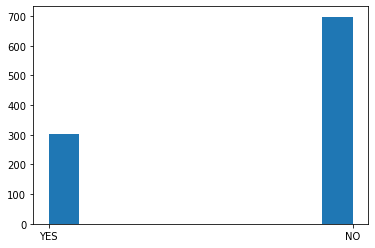

In [17]:
# Visualizing post replacement
plt.hist(insurance_fraud['property_damage'])

(array([314.,   0.,   0.,   0.,   0., 343.,   0.,   0.,   0., 343.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

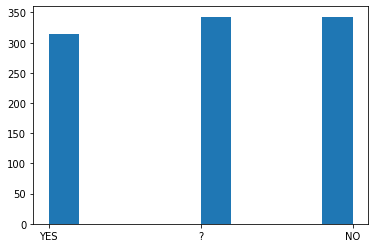

In [18]:
# Visualizing post replacement
plt.hist(insurance_fraud['police_report_available'])

In [19]:
insurance_fraud['police_report_available'] = insurance_fraud['police_report_available'].replace(['?'], 'NO')

In [20]:
insurance_fraud['police_report_available'].mode()

0    NO
dtype: object

(array([314.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 686.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

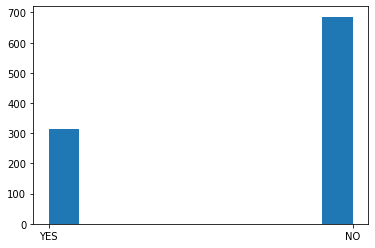

In [21]:
plt.hist(insurance_fraud['police_report_available'])

In [22]:
insurance_fraud

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                      NO               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                      NO              87200   
996       608177  ...         3                      NO             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                      NO               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

(array([352.,   0.,   0.,   0.,   0., 310.,   0.,   0.,   0., 338.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

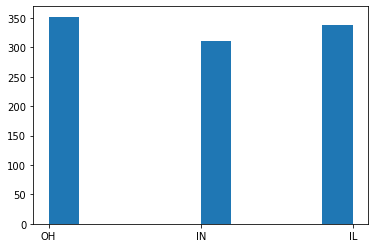

In [23]:
plt.hist(insurance_fraud['policy_state'])

(array([247.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 753.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

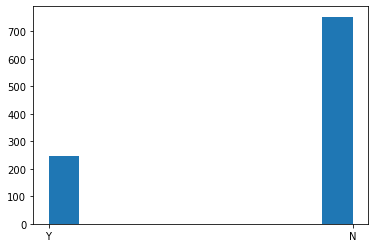

In [24]:
plt.hist(insurance_fraud['fraud_reported'])

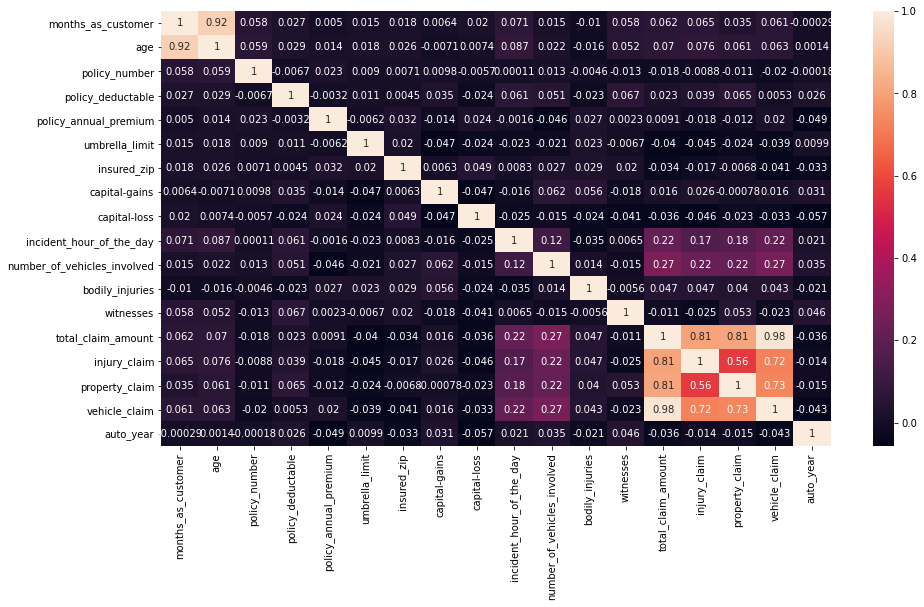

In [25]:
corr = insurance_fraud.corr()
plt.figure(figsize= (15,8))
sns.heatmap(corr, annot = True)

In [26]:
insurance_fraud.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                      NO               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [27]:
# Encoding columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance_fraud["policy_state"] = le.fit_transform(insurance_fraud["policy_state"])
insurance_fraud

months_as_customer  age  policy_number policy_bind_date  policy_state  \
0                   328   48         521585       17-10-2014             2   
1                   228   42         342868       27-06-2006             1   
2                   134   29         687698       06-09-2000             2   
3                   256   41         227811       25-05-1990             0   
4                   228   44         367455       06-06-2014             0   
..                  ...  ...            ...              ...           ...   
995                   3   38         941851       16-07-1991             2   
996                 285   41         186934       05-01-2014             0   
997                 130   34         918516       17-02-2003             2   
998                 458   62         533940       18-11-2011             0   
999                 456   60         556080       11-11-1996             2   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                     YES              71610   
1         468176  ...         0                      NO               5070   
2         430632  ...         3                      NO              34650   
3         608117  ...         2                      NO              63400   
4         610706  ...         1                      NO               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                      NO              87200   
996       608177  ...         3                      NO             108480   
997       442797  ...         3                     YES              67500   
998       441714  ...         1                     YES              46980   
999       612260  ...         3                      NO               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  


In [28]:
insurance_fraud["policy_state"].unique()

array([2, 1, 0])

In [29]:
insurance_fraud["police_report_available"] = le.fit_transform(insurance_fraud["police_report_available"])
insurance_fraud

months_as_customer  age  policy_number policy_bind_date  policy_state  \
0                   328   48         521585       17-10-2014             2   
1                   228   42         342868       27-06-2006             1   
2                   134   29         687698       06-09-2000             2   
3                   256   41         227811       25-05-1990             0   
4                   228   44         367455       06-06-2014             0   
..                  ...  ...            ...              ...           ...   
995                   3   38         941851       16-07-1991             2   
996                 285   41         186934       05-01-2014             0   
997                 130   34         918516       17-02-2003             2   
998                 458   62         533940       18-11-2011             0   
999                 456   60         556080       11-11-1996             2   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                       1              71610   
1         468176  ...         0                       0               5070   
2         430632  ...         3                       0              34650   
3         608117  ...         2                       0              63400   
4         610706  ...         1                       0               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                       0              87200   
996       608177  ...         3                       0             108480   
997       442797  ...         3                       1              67500   
998       441714  ...         1                       1              46980   
999       612260  ...         3                       0               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  


In [30]:
# Transforming the columns
insurance_fraud["fraud_reported"] = le.fit_transform(insurance_fraud["fraud_reported"])
insurance_fraud["insured_sex"] = le.fit_transform(insurance_fraud["insured_sex"])
insurance_fraud["insured_education_level"] = le.fit_transform(insurance_fraud["insured_education_level"])
insurance_fraud["insured_occupation"] = le.fit_transform(insurance_fraud["insured_occupation"])
insurance_fraud["insured_hobbies"] = le.fit_transform(insurance_fraud["insured_hobbies"])
insurance_fraud["insured_relationship"] = le.fit_transform(insurance_fraud["insured_relationship"])

insurance_fraud["incident_type"] = le.fit_transform(insurance_fraud["incident_type"])
insurance_fraud["collision_type"] = le.fit_transform(insurance_fraud["collision_type"])
insurance_fraud["incident_severity"] = le.fit_transform(insurance_fraud["incident_severity"])
insurance_fraud["authorities_contacted"] = le.fit_transform(insurance_fraud["authorities_contacted"])
insurance_fraud["incident_state"] = le.fit_transform(insurance_fraud["incident_state"])
insurance_fraud["incident_city"] = le.fit_transform(insurance_fraud["incident_city"])
insurance_fraud["incident_location"] = le.fit_transform(insurance_fraud["incident_location"])
insurance_fraud["property_damage"] = le.fit_transform(insurance_fraud["property_damage"])
insurance_fraud["auto_make"] = le.fit_transform(insurance_fraud["auto_make"])

insurance_fraud


months_as_customer  age  policy_number policy_bind_date  policy_state  \
0                   328   48         521585       17-10-2014             2   
1                   228   42         342868       27-06-2006             1   
2                   134   29         687698       06-09-2000             2   
3                   256   41         227811       25-05-1990             0   
4                   228   44         367455       06-06-2014             0   
..                  ...  ...            ...              ...           ...   
995                   3   38         941851       16-07-1991             2   
996                 285   41         186934       05-01-2014             0   
997                 130   34         918516       17-02-2003             2   
998                 458   62         533940       18-11-2011             0   
999                 456   60         556080       11-11-1996             2   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ...  witnesses  police_report_available  total_claim_amount  \
0         466132  ...          2                        1               71610   
1         468176  ...          0                        0                5070   
2         430632  ...          3                        0               34650   
3         608117  ...          2                        0               63400   
4         610706  ...          1                        0                6500   
..           ...  ...        ...                      ...                 ...   
995       431289  ...          1                        0               87200   
996       608177  ...          3                        0              108480   
997       442797  ...          3                        1               67500   
998       441714  ...          1                        1               46980   
999       612260  ...          3                        0                5060   

     injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0            6510           13020          52080         10        92x   
1             780             780           3510          8       E400   
2            7700            3850          23100          4        RAM   
3            6340            6340          50720          3      Tahoe   
4            1300             650           4550          0        RSX   
..            ...             ...            ...        ...        ...   
995         17440            8720          61040          6     Accord   
996         18080           18080          72320         13     Passat   
997          7500            7500          52500         11    Impreza   
998          5220            5220          36540          1         A5   
999           460             920           3680          8       E400   

     auto_year  fraud_reported  
0         2004               1  
1         2007               1  
2         2007               0  
3         2014               1  
4         2009               0  
..         ...             ...  
995       2006               0  
996       2015               

In [31]:
insurance_fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                     int32
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_location                int32
incident_hour_of_the_day 

In [32]:
insurance_fraud.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [33]:
x = insurance_fraud[['months_as_customer', 'age', 'policy_number',
       'policy_state', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_year']]

In [34]:
y = insurance_fraud['fraud_reported']

# Training and predecting the data 

In [35]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [36]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\Prashant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [37]:
y_pred = logmodel.predict(x_test)

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[157,   0],
       [ 41,   2]], dtype=int64)

In [39]:
(146+1)/(146+1+53)

0.735

# We have gained 74% of accuracy in the classification problem

# Let us now work on another dataset 'insurance_claims' to predict claim amount which may be a Linear Regression problem

In [40]:
insurance_claims

Customer Country State Code     State  Claim Amount Response  Coverage  \
0     BU79786      US         KS    Kansas    276.351928       No     Basic   
1     QZ44356      US         NE  Nebraska    697.953590       No  Extended   
2     AI49188      US         OK  Oklahoma   1288.743165       No   Premium   
3     WW63253      US         MO  Missouri    764.586183       No     Basic   
4     HB64268      US         KS    Kansas    281.369258       No     Basic   
...       ...     ...        ...       ...           ...      ...       ...   
6899  EE57466      US         NE  Nebraska    239.703610      Yes     Basic   
6900  QV86635      US         MO  Missouri    742.750179       No  Extended   
6901  RT51330      US         MO  Missouri    251.063322       No     Basic   
6902  QW44380      US         KS    Kansas    263.760269       No     Basic   
6903  IK66117      US         MO  Missouri    496.935760      NaN       NaN   

                 Education Effective To Date EmploymentStatus  ...  \
0                 Bachelor           2/24/11         Employed  ...   
1                 Bachelor           1/31/11       Unemployed  ...   
2                 Bachelor           2/19/11         Employed  ...   
3                 Bachelor           1/20/11       Unemployed  ...   
4                 Bachelor            2/3/11         Employed  ...   
...                    ...               ...              ...  ...   
6899  High School or Below           1/29/11          Retired  ...   
6900              Bachelor            1/8/11         Employed  ...   
6901                Doctor           1/25/11       Unemployed  ...   
6902  High School or Below           1/11/11         Employed  ...   
6903                   NaN               NaN              NaN  ...   

     Months Since Policy Inception  Number of Open Complaints  \
0                              5.0                        0.0   
1                             42.0                        0.0   
2                             38.0                        0.0   
3                             65.0                        0.0   
4                             44.0                        0.0   
...                            ...                        ...   
6899                          93.0                        0.0   
6900                          54.0                        0.0   
6901                           1.0                        0.0   
6902                          30.0                        0.0   
6903                           NaN                        NaN   

     Number of Policies     Policy Type        Policy  Claim Reason  \
0                   1.0  Corporate Auto  Corporate L3     Collision   
1                   8.0   Personal Auto   Personal L3  Scratch/Dent   
2                   2.0   Personal Auto   Personal L3     Collision   
3                   7.0  Corporate Auto  Corporate L2     Collision   
4                   1.0   Personal Auto   Personal L1     Collision   
...                 ...             ...           ...           ...   
6899                1.0   Personal Auto   Personal L1     Collision   
6900                7.0  Corporate Auto  Corporate L3  Scratch/Dent   
6901                1.0  Corporate Auto  Corporate L3         Other   
6902                1.0   Personal Auto   Personal L2          Hail   
6903                NaN             NaN           NaN           NaN   

      Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0             Agent          384.811147   Two-Door Car      Medsize  
1             Agent         1131.464935  Four-Door Car      Medsize  
2             Agent          566.472247   Two-Door Car      Medsize  
3       Call Center          529.881344            SUV      Medsize  
4             Agent          138.130879  Four-Door Car      Medsize  
...             ...                 ...            ...          ...  
6899         Branch          572.072106  Four-Door Car      Medsize  
6900         Branch  

In [41]:
insurance_claims.dtypes

Customer                          object
Country                           object
State Code                        object
State                             object
Claim Amount                     float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                           float64
Location Code                     object
Marital Status                    object
Monthly Premium Auto             float64
Months Since Last Claim          float64
Months Since Policy Inception    float64
Number of Open Complaints        float64
Number of Policies               float64
Policy Type                       object
Policy                            object
Claim Reason                      object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class   

In [42]:
insurance_claims.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         1
Coverage                         1
Education                        1
Effective To Date                1
EmploymentStatus                 1
Gender                           1
Income                           1
Location Code                    1
Marital Status                   1
Monthly Premium Auto             1
Months Since Last Claim          1
Months Since Policy Inception    1
Number of Open Complaints        1
Number of Policies               1
Policy Type                      1
Policy                           1
Claim Reason                     1
Sales Channel                    1
Total Claim Amount               1
Vehicle Class                    1
Vehicle Size                     1
dtype: int64

In [65]:
# I can clearly see just by looking at the basic data that isnull() must be the last column. Thus dropping that
insurance_claims.drop(insurance_claims.index[[-1, 0,-1]], inplace = True)

In [70]:
# Yes i was right. I dont see any more null values
insurance_claims.isnull().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [67]:
col = insurance_claims.columns

In [71]:
# Visualizing for any abnormal values
for i in col:
    print(i, ':', insurance_claims[i].unique())

Customer : ['QZ44356' 'AI49188' 'WW63253' ... 'QV86635' 'RT51330' 'QW44380']
Country : ['US']
State Code : ['NE' 'OK' 'MO' 'KS' 'IA']
State : ['Nebraska' 'Oklahoma' 'Missouri' 'Kansas' 'Iowa']
Claim Amount : [ 697.9535903 1288.743165   764.5861827 ...  742.7501786  251.0633216
  263.7602689]
Response : ['No' 'Yes']
Coverage : ['Extended' 'Premium' 'Basic']
Education : ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
Effective To Date : ['1/31/11' '2/19/11' '1/20/11' '2/3/11' '1/25/11' '2/24/11' '1/18/11'
 '1/26/11' '2/17/11' '2/21/11' '1/6/11' '2/6/11' '1/10/11' '1/17/11'
 '1/5/11' '2/27/11' '1/14/11' '1/21/11' '2/5/11' '1/29/11' '2/28/11'
 '2/12/11' '2/2/11' '2/7/11' '1/22/11' '2/13/11' '1/15/11' '1/8/11'
 '1/11/11' '1/28/11' '2/8/11' '2/23/11' '1/2/11' '2/16/11' '1/27/11'
 '1/23/11' '1/9/11' '2/11/11' '2/4/11' '2/1/11' '2/15/11' '2/26/11'
 '1/16/11' '1/1/11' '2/10/11' '1/24/11' '2/25/11' '1/12/11' '2/9/11'
 '1/19/11' '1/4/11' '2/14/11' '2/20/11' '2/18/11' '1/3/11' '1/1

In [76]:
corr = insurance_claims.corr()
corr

Claim Amount    Income  Monthly Premium Auto  \
Claim Amount                       1.000000  0.026813              0.405906   
Income                             0.026813  1.000000             -0.009769   
Monthly Premium Auto               0.405906 -0.009769              1.000000   
Months Since Last Claim            0.011972 -0.027692              0.007979   
Months Since Policy Inception      0.014228 -0.008714              0.029229   
Number of Open Complaints         -0.031805  0.019682             -0.018860   
Number of Policies                 0.024240 -0.012252             -0.009150   
Total Claim Amount                 0.219615 -0.349993              0.627981   

                               Months Since Last Claim  \
Claim Amount                                  0.011972   
Income                                       -0.027692   
Monthly Premium Auto                          0.007979   
Months Since Last Claim                       1.000000   
Months Since Policy Inception                -0.033160   
Number of Open Complaints                     0.007115   
Number of Policies                            0.003914   
Total Claim Amount                            0.015063   

                               Months Since Policy Inception  \
Claim Amount                                        0.014228   
Income                                             -0.008714   
Monthly Premium Auto                                0.029229   
Months Since Last Claim                            -0.033160   
Months Since Policy Inception                       1.000000   
Number of Open Complaints                          -0.000942   
Number of Policies                                 -0.017927   
Total Claim Amount                                  0.014396   

                               Number of Open Complaints  Number of Policies  \
Claim Amount                                   -0.031805            0.024240   
Income                                          0.019682           -0.012252   
Monthly Premium Auto                           -0.018860           -0.009150   
Months Since Last Claim                         0.007115            0.003914   
Months Since Policy Inception                  -0.000942           -0.017927   
Number of Open Complaints                       1.000000            0.002217   
Number of Policies                              0.002217            1.000000   
Total Claim Amount                             -0.026709           -0.008749   

                               Total Claim Amount  
Claim Amount                             0.219615  
Income                                  -0.349993  
Monthly Premium Auto                     0.627981  
Months Since Last Claim                  0.015063  
Months Since Policy Inception            0.014396  
Number of Open Complaints               -0.026709  
Number of Policies                      -0.008749  
Total Claim Amount                       1.000000

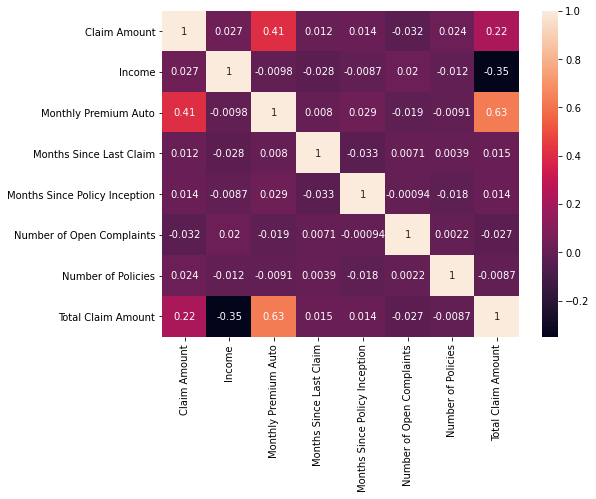

In [83]:
plt.figure(figsize = (8,6))
sns.heatmap(corr, annot = True)

In [88]:
# Transforming columns 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance_claims["Country"] = le.fit_transform(insurance_claims["Country"])
insurance_claims["State Code"] = le.fit_transform(insurance_claims["State Code"])
insurance_claims["State"] = le.fit_transform(insurance_claims["State"])
insurance_claims["Response"] = le.fit_transform(insurance_claims["Response"])
insurance_claims["Coverage"] = le.fit_transform(insurance_claims["Coverage"])
insurance_claims["Education"] = le.fit_transform(insurance_claims["Education"])
insurance_claims["EmploymentStatus"] = le.fit_transform(insurance_claims["EmploymentStatus"])
insurance_claims["Gender"] = le.fit_transform(insurance_claims["Gender"])
insurance_claims["Location Code"] = le.fit_transform(insurance_claims["Location Code"])
insurance_claims["Marital Status"] = le.fit_transform(insurance_claims["Marital Status"])
insurance_claims["Policy Type"] = le.fit_transform(insurance_claims["Policy Type"])
insurance_claims["Policy"] = le.fit_transform(insurance_claims["Policy"])
insurance_claims["Claim Reason"] = le.fit_transform(insurance_claims["Claim Reason"])
insurance_claims["Sales Channel"] = le.fit_transform(insurance_claims["Sales Channel"])
insurance_claims["Vehicle Class"] = le.fit_transform(insurance_claims["Vehicle Class"])
insurance_claims["Vehicle Size"] = le.fit_transform(insurance_claims["Vehicle Size"])

insurance_claims

Customer  Country  State Code  State  Claim Amount  Response  Coverage  \
1     QZ44356        0           3      3    697.953590         0         1   
2     AI49188        0           4      4   1288.743165         0         2   
3     WW63253        0           2      2    764.586183         0         0   
4     HB64268        0           1      1    281.369258         0         0   
5     OC83172        0           0      0    825.629780         1         0   
...       ...      ...         ...    ...           ...       ...       ...   
6898  MU53244        0           2      2    509.543982         0         1   
6899  EE57466        0           3      3    239.703610         1         0   
6900  QV86635        0           2      2    742.750179         0         1   
6901  RT51330        0           2      2    251.063322         0         0   
6902  QW44380        0           1      1    263.760269         0         0   

      Education Effective To Date  EmploymentStatus  ...  \
1             0           1/31/11                 4  ...   
2             0           2/19/11                 1  ...   
3             0           1/20/11                 4  ...   
4             0            2/3/11                 1  ...   
5             0           1/25/11                 1  ...   
...         ...               ...               ...  ...   
6898          0           2/24/11                 4  ...   
6899          3           1/29/11                 3  ...   
6900          0            1/8/11                 1  ...   
6901          2           1/25/11                 4  ...   
6902          3           1/11/11                 1  ...   

      Months Since Policy Inception  Number of Open Complaints  \
1                              42.0                        0.0   
2                              38.0                        0.0   
3                              65.0                        0.0   
4                              44.0                        0.0   
5                              94.0                        0.0   
...                             ...                        ...   
6898                           30.0                        0.0   
6899                           93.0                        0.0   
6900                           54.0                        0.0   
6901                            1.0                        0.0   
6902                           30.0                        0.0   

      Number of Policies  Policy Type  Policy  Claim Reason  Sales Channel  \
1                    8.0            1       5             3              0   
2                    2.0            1       5             0              0   
3                    7.0            0       1             0              2   
4                    1.0            1       3             0              0   
5                    2.0            1       5             1              3   
...                  ...          ...     ...           ...            ...   
6898                 1.0            1       4             0              3   
6899                 1.0            1       3             0              1   
6900                 7.0            0       2             3              1   
6901                 1.0            0       2             2              1   
6902                 1.0            1       4             1              2   

      Total Claim Amount  Vehicle Class  Vehicle Size  
1            1131.464935              0             1  
2             566.472247              5             1  
3             529.881344              3             1  
4             138.130879              0             1  
5             159.383042              5             1  
...                  ...            ...           ...  
6898          452.295175              3             1  
6899          572.072106              0             1  
6900          450.596865              5             1  
6901          437.184112              0      

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
insurance_claims.columns

Index(['Customer', 'Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [95]:
x = insurance_claims[['Country', 'State Code', 'State', 'Claim Amount',
       'Response', 'Coverage', 'Education',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Claim Reason',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size']]

In [96]:
y = insurance_claims['Total Claim Amount']

# Training & Predecting data

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 40, test_size = 0.30)

In [102]:
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)

LinearRegression()

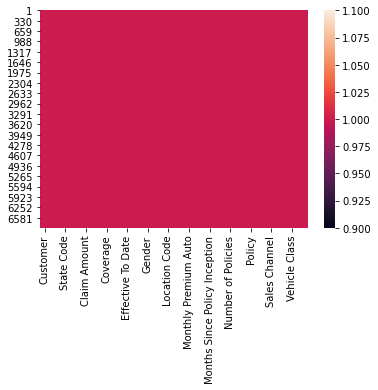

In [101]:
sns.heatmap(pd.notnull(insurance_claims))

In [103]:
Y_pred = linear_regressor.predict(x_test)

In [110]:
print(f'R2 score for train: {linear_regressor.score(x_train, y_train)}')
print(f'R2 score for test: {linear_regressor.score(x_test, y_test)}')

R2 score for train: 0.6110905740467437
R2 score for test: 0.5899137764865656


In [111]:
y_pred_test = linear_regressor.predict(x_test)
y_pred_train = linear_regressor.predict(x_train)

In [113]:
from sklearn.metrics import mean_squared_error
print(f'mean squared error train : {mean_squared_error(y_train, y_pred_train)}')
print(f'mean squared error test : {mean_squared_error(y_test, y_pred_test)}')

mean squared error train : 32053.199363001717
mean squared error test : 33978.133783588535


# End of EDA